In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pylab
from mpl_toolkits.mplot3d import Axes3D

## Images Points

In [2]:
matrix = sio.loadmat('./assignment3/sfm_points.mat')['image_points']
matrix.shape

(2, 600, 10)

## Translation Vector t

In [14]:
translation_vector = np.mean(matrix,axis=1)
translation_vector

array([[ 5.49560397e-17,  3.31216536e-17, -1.06118817e-16,
         4.27435864e-17, -9.25185854e-19, -7.75305746e-17,
         1.22124533e-17,  4.99600361e-18, -9.43689571e-18,
        -2.08166817e-18],
       [-7.03141249e-18,  3.97829917e-18,  1.24900090e-17,
        -1.85962357e-17, -3.99217696e-17,  8.83552490e-17,
         6.36527867e-17,  2.71773345e-18, -2.14643118e-17,
         3.85802501e-17]])

## Measurement Matrix W

In [4]:
matrix_centered = np.zeros(matrix.shape)
for i in range(matrix_centered.shape[0]):
    for j in range(matrix_centered.shape[2]):
        matrix_centered[i,:,j] = matrix[i,:,j] - translation_vector[i][j]

In [15]:
measurement_matrix = np.zeros([matrix.shape[0]*matrix.shape[2],matrix.shape[1]])
for i in range(matrix.shape[1]):
    for j in range(matrix.shape[2]):
            measurement_matrix[2*j,i] = matrix_centered[0,i,j]
            measurement_matrix[2*j+1,i] = matrix_centered[1,i,j]

## SVD Decomposition of W

In [6]:
U,D,V = np.linalg.svd(measurement_matrix)
V = V.T
D = D * np.identity(D.shape[0])

## Camera Location M

In [7]:
M = np.dot(U[:,:3],D[:3,:3])
M

array([[-7.50914219,  3.30837904, -3.71763726],
       [-4.53754376, -1.57773527,  7.74574759],
       [ 0.17858821, -8.56620251, -2.47587867],
       [ 9.05169424,  0.12603637,  0.70587237],
       [ 8.25306132,  2.16911022, -3.48212517],
       [-0.13132314, -7.68175234, -4.32518806],
       [-3.76826539, -8.34775199,  1.20087007],
       [ 8.27600638, -3.50666717,  0.57004455],
       [-0.73461089, -8.39784553, -2.88977146],
       [-8.50036578,  1.60529571, -2.55252038],
       [ 8.45690903, -2.56525708, -1.79392742],
       [-3.28948312, -6.10374195, -5.44642826],
       [-2.96665571, -7.78843781, -3.22986642],
       [ 8.45107965, -1.64131526, -2.78078037],
       [-1.4368307 , -8.62307292,  3.07678742],
       [-7.95142326, -0.23710514, -4.1742912 ],
       [ 8.6277954 , -2.12325785, -1.6361374 ],
       [-0.41749971,  4.10544054, -8.14813897],
       [ 7.44257036, -3.77728996,  3.4002285 ],
       [-5.22854825, -5.82482627,  5.11580038]])

## 3D World Points Locations

In [8]:
_3D_points = V[:,:3]

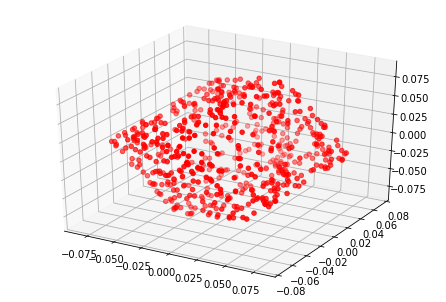

In [9]:
pylab.ion()
fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter3D(_3D_points[:,0], _3D_points[:,1], _3D_points[:,2],marker="o",color='r');

## Save data to Plot in Matlab

In [10]:
np.savetxt('3D_points.txt',_3D_points)

## M and t in The First Camera

In [11]:
print(M[:2])

[[-7.50914219  3.30837904 -3.71763726]
 [-4.53754376 -1.57773527  7.74574759]]


In [12]:
print(translation_vector[:,0])

[ 5.49560397e-17 -7.03141249e-18]


## First 10 World Points

In [13]:
print(_3D_points[:10])

[[ 0.00577163  0.06460628 -0.02497615]
 [ 0.0005761   0.06885363 -0.03458151]
 [-0.04293585  0.06330479  0.02861711]
 [ 0.04745038  0.04904207 -0.01257547]
 [-0.04210186  0.06789239  0.01175164]
 [ 0.05961964  0.0460518  -0.01438374]
 [ 0.00909167  0.06002049 -0.01229997]
 [ 0.01039489  0.04602065  0.03529275]
 [-0.02589081  0.05702972  0.03337375]
 [ 0.01745598  0.04054264  0.04731859]]
